## Graphs

There are composed by nodes or vertex.
Between each nodes there are edge or connections. 

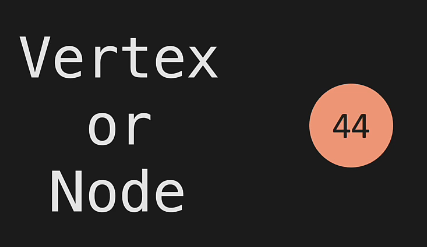

So we have vertices and edges. Each vertex can have an edge with other vertex and so on.
There are no limits of how many vertices I can be connected on.

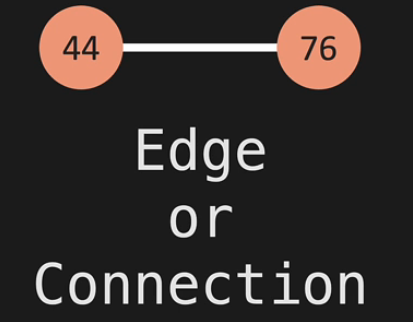

Essentially, for go to one vertex to another, I can weight the edges (to quantify the cost),
and then, I could enroute the lighest path to reach a given edge. 

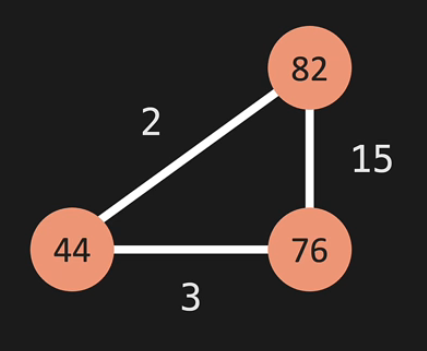

Tipically this data structred is illustrated in social media platofrms. 
i.e, in Instagram when I follow a celebrity, he/she doesn't follow me back, so the edge in unidirectional between two vertex.
but if I follow a friend, most probable the friend will follow me back and then the relation of the vertices will be bidirectional.
So, vertex relation through edges could be bi-directional or uni-directional.
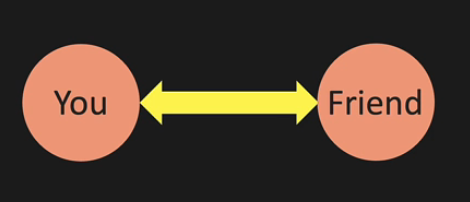
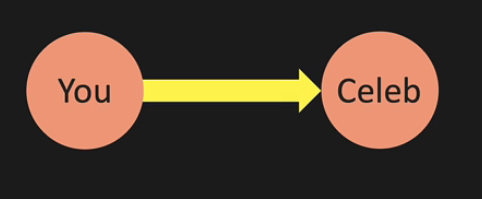

Trees are a form of graphs, but trees has the limitation that each edge could point only to two nodes. 
And a trees are a form of a tree, with the limitation that they only can point to another node. 
But essentially those data structures are closely related.

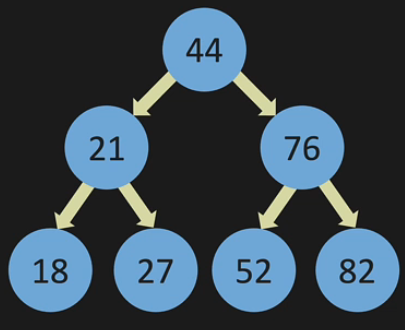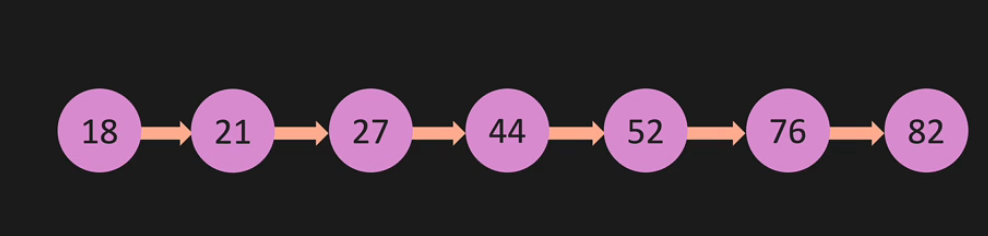

### Adjacency matrix

There is two ways of representing a graph. the first way is trhough an adjacency matrix.

In the following figure, we see that the vertex 'A' has two edges, one to 'E' and another to 'B'.

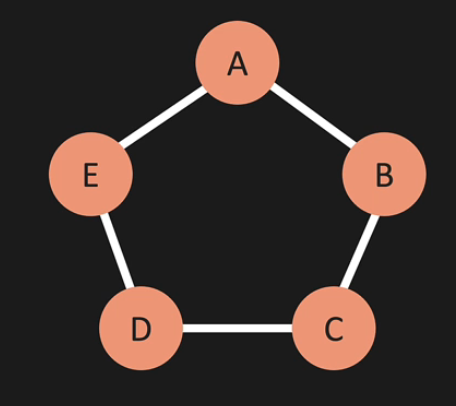

So, mapping the 'A' connection, we could represent it into the following Matrix:

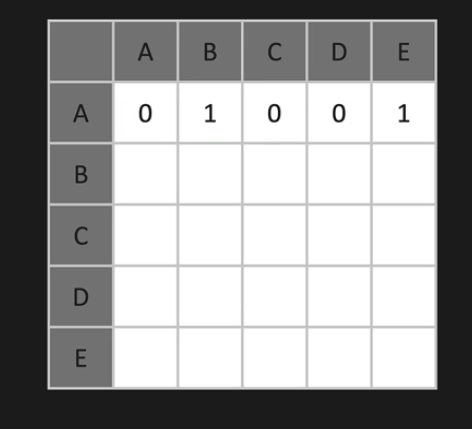


And doing so for all other vertices, we represent the graph relationship through an Adjacency matrix.

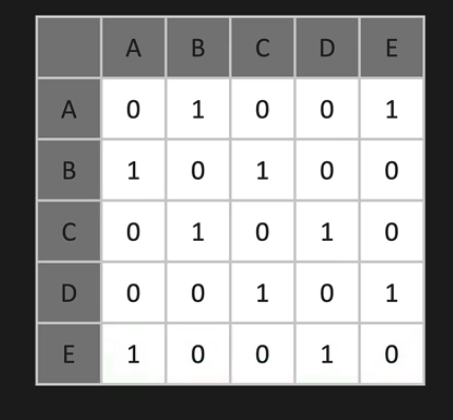

The rows representex the vertices and the columns represent the relation that each vertex has with another.


An adjencency matrix will always contains 0s at it's diagonal because a vertex cannot be related with itself.
Also we will have a pattern of diagonal values, only if the relationship is bi-directional.

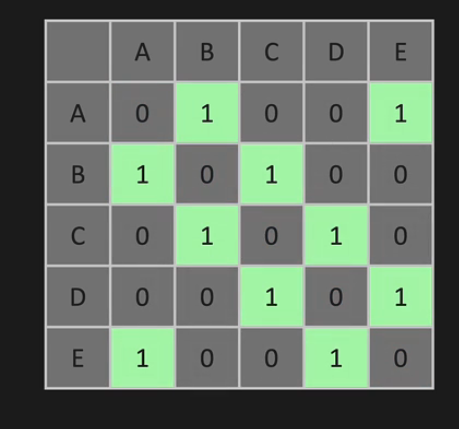

In case there are some uni-directional relationship, shuch as follow with A to B:

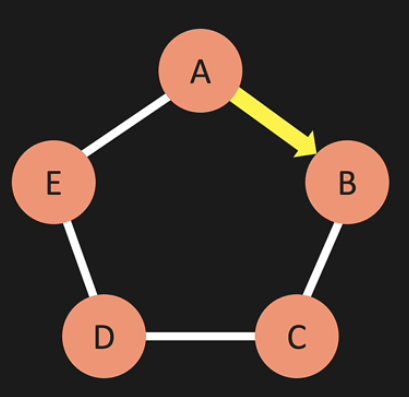

Then the adjacency matrix will result as follows:

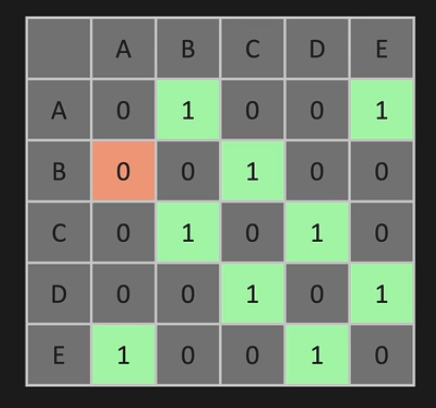


Also, if the edges are weighted, the adcency matrix will take the value of the weighted edge.

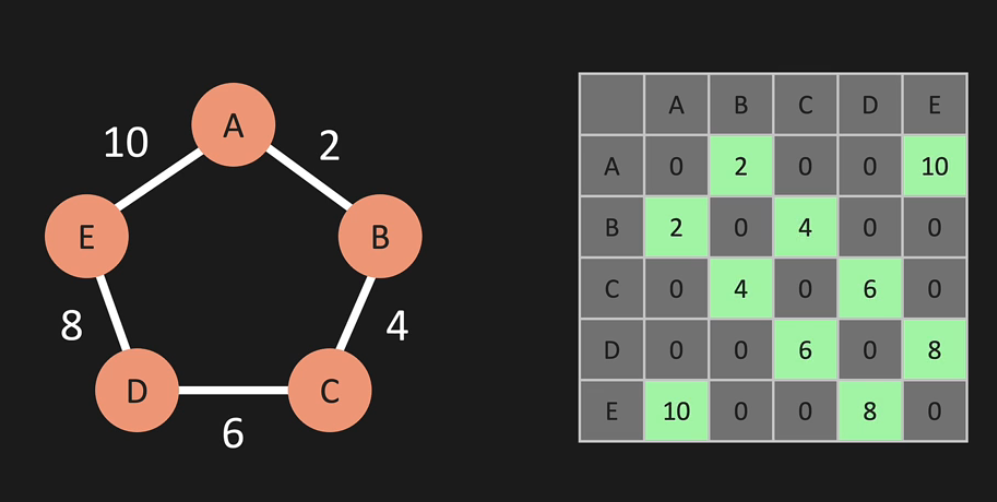

### Adjacency list

Another way of representing a graph.
In this case, it is represented with a dictionary, like the follow code:

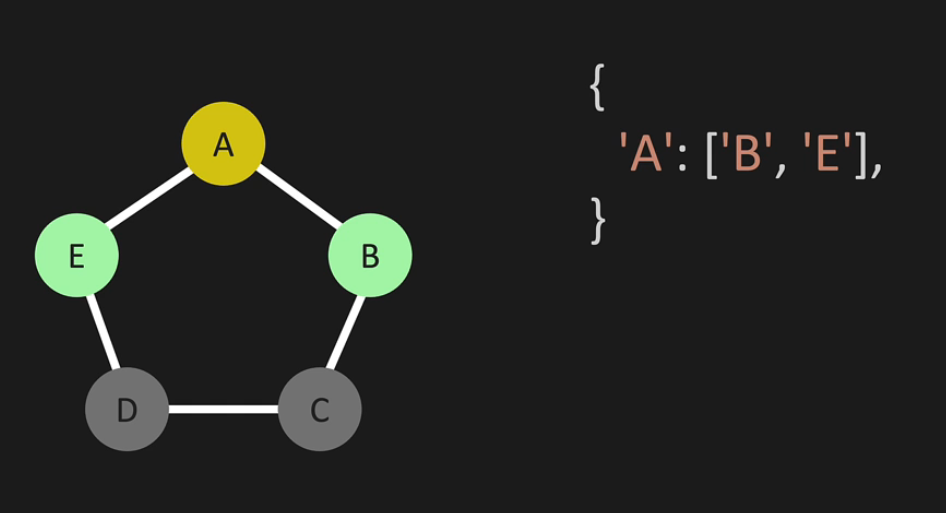

As we keep going, the dictionary starts to grow:

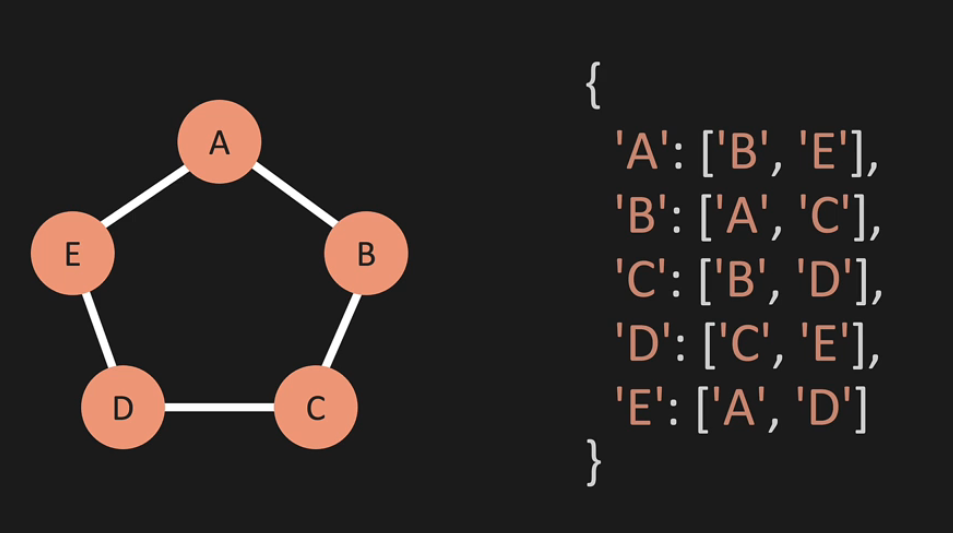


### Graph: Big O.

We're going to represent the big O through an adjacency matrix and adjacency list. Both have different use cases and, as a bottom line, we're going to use the adjacency list for it's reduced complexity in comparison with the adjacency matrix. In following, it is going to be presented the main differences.


<h4>Space complexity</h4>
In terms of space complexity, if we compare the adjacency matrix with the adjacency list, a huge difference is that in a matrix we store all the vertices that each not is connected and not connected to: O(n^2). In an adjacency list, we only store the edges of the connected vertices O(V+E).

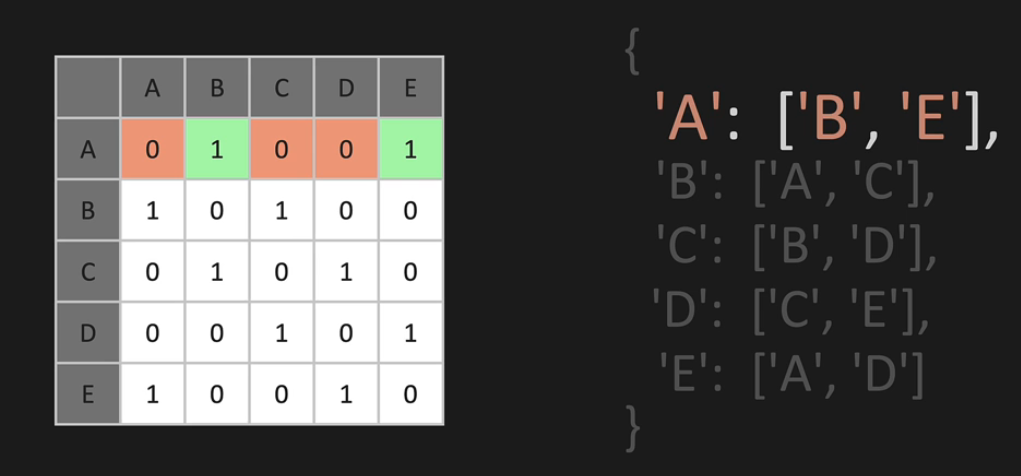  
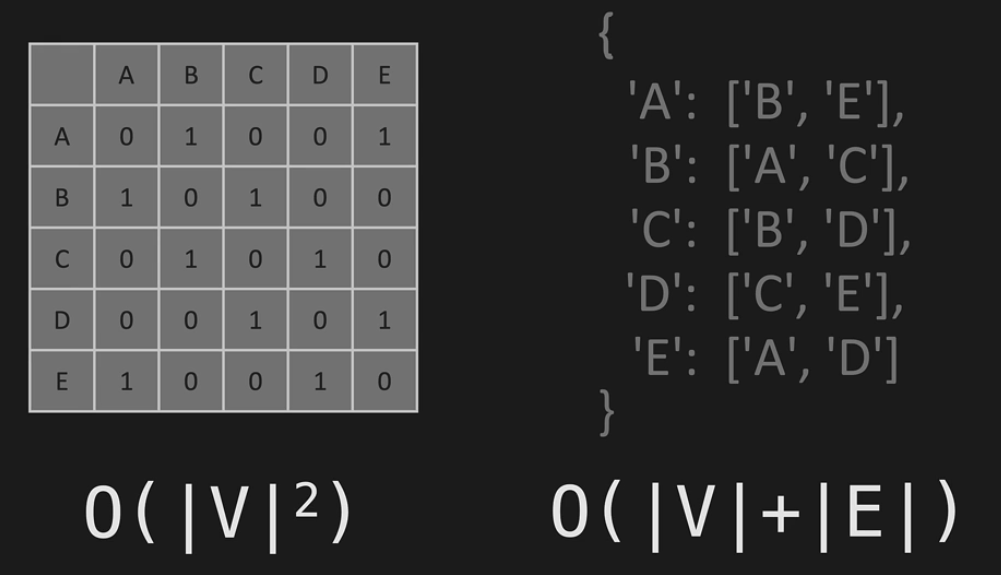

<i>V: Vertices, </br> E: Edges.</i>



<h4>Adding a vertex</h4>
With an adjacency list, for adding an edge we only need to push a new key into the dictionary: O(1).
Wit an adjacency matrix, we will need to iterate over all the vertices and all the connections, so in O(n^2).

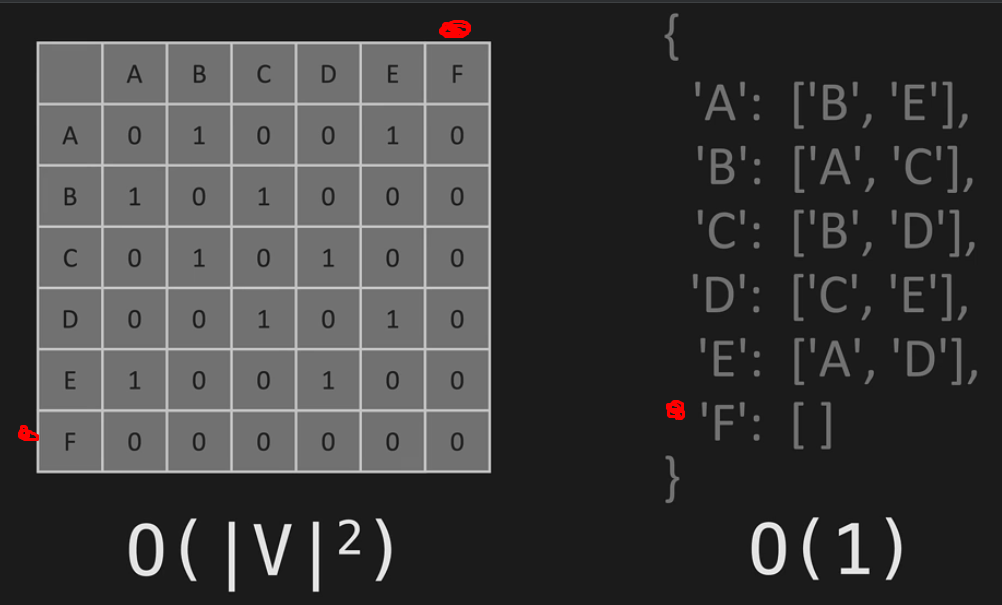

<h4> Adding an edge (connection)</h4>
Adding a new connection between vertices are O(1) in both cases. In both we only need to do 1 operation.

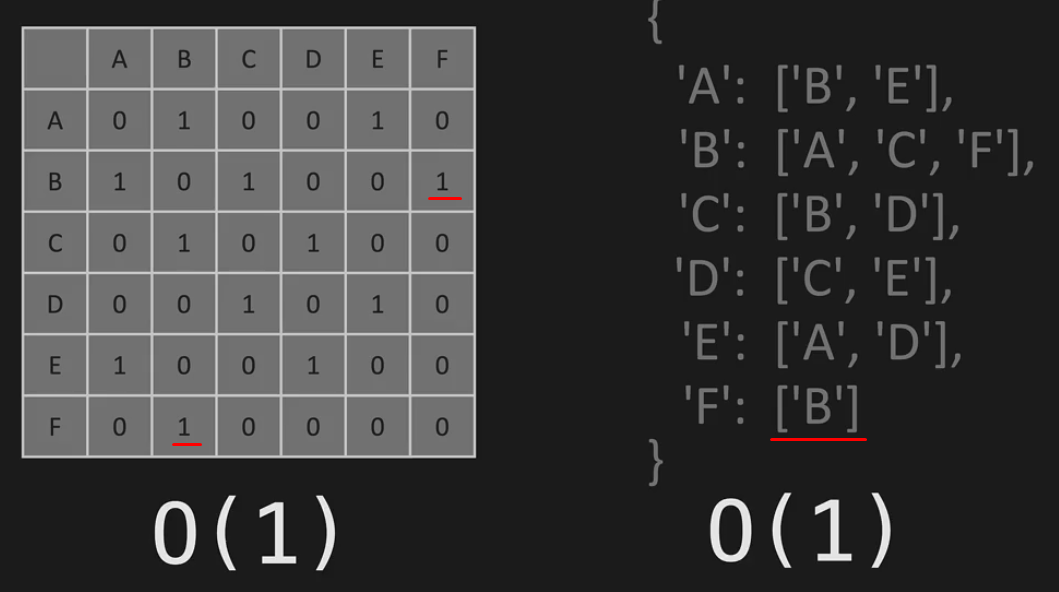



<h4>Remove an edge</h4>
With an adjacency list, we will need to iterate over all the keys to find all of them wich contains the edge needed to be removed: O(E).
With an adjacency matrix, as well as we did for adding an edge, we only need to mark from 1 to 0 the cells: O(1). This is the only case when the matrix wins.

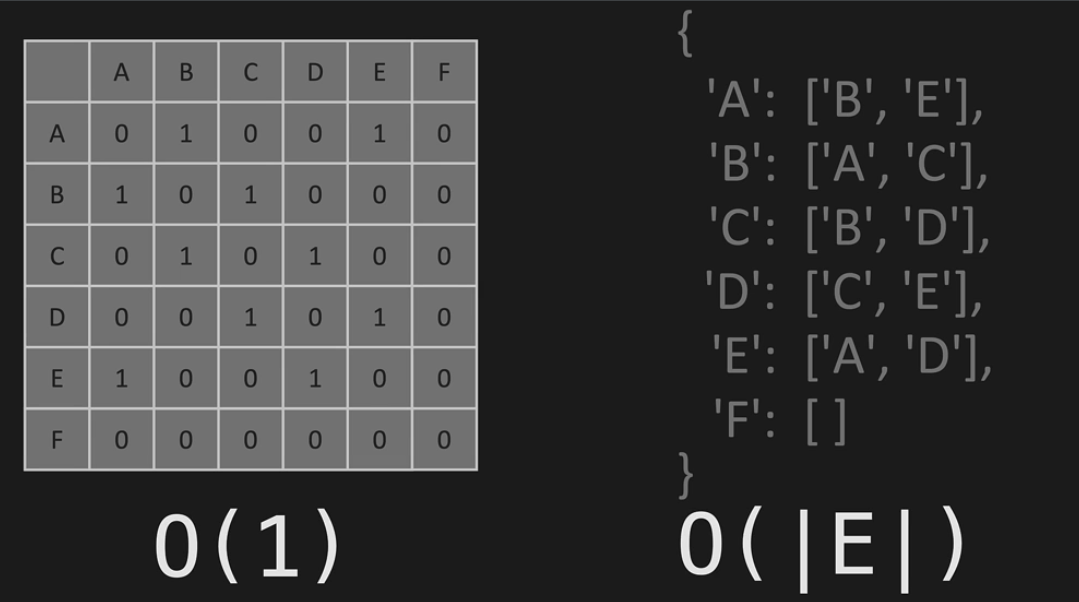


<h4>Remove a vertex</h4>
With an adjacency list, we need to drop the element key and also, iterates over all the other keys looking for edges with the deleted one in order to remove it: O(V).
With an adjacency matrix, we need to go over rows and columns: O(n^2).


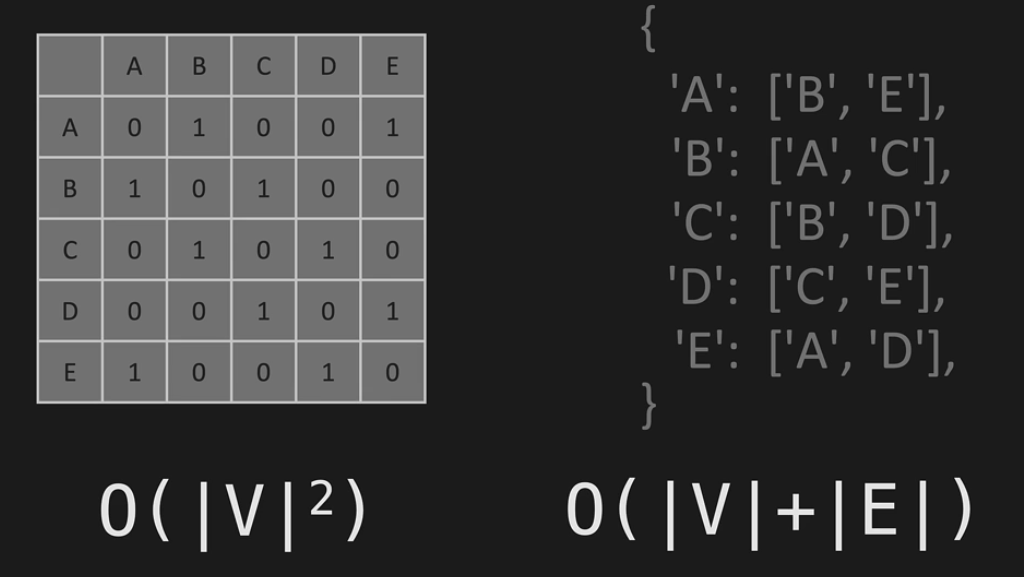


<h4>Conclusion</h4>
The adjacency matrix is no big deal when we have a few of vertices and edges, but once we scalce (imagine a colosus company), we will have depth optimziation issues, the adjacency matrix operates (on common cases) in O(n^2) for which we, using an adjacency list, don't.



## Code

In [19]:
# Class

class Graph:
    def __init__(self):
        self.adj_list = {}

    
    def add_vertex(self, vertex):
        """Adds new vertex into the adjacency list of the graph.

        Args:
            vertex (_type_): _description_

        Returns:
            _type_: _description_
        """
        if vertex not in self.adj_list.keys(): # if the vertex is not already appended
            self.adj_list[vertex] = []
            return True
        return False

    def add_edge(self, v1, v2):
        """_summary_

        Args:
            v1 (_type_): Vertex 1.
            v2 (_type_): Vertex 2.
        """

        if (v1 in self.adj_list.keys() and v2 in self.adj_list.keys()) and (v1 != v2):
            if v2 in self.adj_list[v1]: # If true, then already appended the edge
                return False
            self.adj_list[v1].append(v2)
            self.adj_list[v2].append(v1)
            return True
        return False
    
    def removing_edge(self, v1, v2):
        if v1 in self.adj_list.keys() and v2 in self.adj_list.keys():
            if v2 in self.adj_list[v1]:
                self.adj_list[v1].remove(v2)
                self.adj_list[v2].remove(v1)
                return True
            else:
                return False
        return False
    

    def print_graph(self):
        for vertex in self.adj_list:
            print(vertex, ":", self.adj_list[vertex])
        

if __name__ == "__main__":
    my_graph = Graph()
    my_graph.add_vertex('A')
    my_graph.add_vertex('B')
    my_graph.add_vertex('C')
    my_graph.print_graph()

    # adding an edge
    print("*"*20)
    my_graph.add_edge('A','B')
    my_graph.add_edge('B','C')
    my_graph.add_edge('C','A')
    my_graph.add_edge('C','A') # edge case ('cause is repeated)
    my_graph.add_edge('A','A') # edge case
    my_graph.print_graph()

    






A : []
B : []
C : []
********************
A : ['B', 'C']
B : ['A', 'C']
C : ['B', 'A']
